In [1]:
import node
import pandas as pd
import numpy as np
import collections
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../data/nuforc_reports.csv')
df.head(5)

,summary,city,state,date_time,shape,duration,stats,report_link,text,posted,city_latitude,city_longitude
0,My wife was driving southeast on a fairly popu...,Chester,VA,2019-12-12T18:43:00,light,5 seconds,Occurred : 12/12/2019 18:43 (Entered as : 12/...,http://www.nuforc.org/webreports/151/S151739.html,My wife was driving southeast on a fairly popu...,2019-12-22T00:00:00,37.343152,-77.408582
1,I think that I may caught a UFO on the NBC Nig...,Rocky Hill,CT,2019-03-22T18:30:00,circle,3-5 seconds,Occurred : 3/22/2019 18:30 (Entered as : 03/2...,http://www.nuforc.org/webreports/145/S145297.html,I think that I may caught a UFO on the NBC Nig...,2019-03-29T00:00:00,41.664800,-72.639300
2,I woke up late in the afternoon 3:30-4pm. I we...,NaN,NaN,NaN,NaN,NaN,Occurred : 4/1/2019 15:45 (Entered as : April...,http://www.nuforc.org/webreports/145/S145556.html,I woke up late in the afternoon 3:30-4pm. I w...,NaN,NaN,NaN
3,I was driving towards the intersection of fall...,Ottawa,ON,2019-04-17T02:00:00,teardrop,10 seconds,Occurred : 4/17/2019 02:00 (Entered as : 04-1...,http://www.nuforc.org/webreports/145/S145697.html,I was driving towards the intersection of fall...,2019-04-18T00:00:00,45.381383,-75.708501
4,"In Peoria Arizona, I saw a cigar shaped craft ...",Peoria,NY,2009-03-15T18:00:00,cigar,2 minutes,Occurred : 3/15/2009 18:00 (Entered as : 03/1...,http://www.nuforc.org/webreports/145/S145723.html,"In Peoria, Arizona, I saw a cigar shaped craft...",2019-04-18T00:00:00,NaN,NaN


### Create Vect Obj

In [3]:
shapes = node.vect('shape')
shapes.set_up(list(df['shape']),True)

state = node.vect('state')
state.set_up(list(df['state']),True)

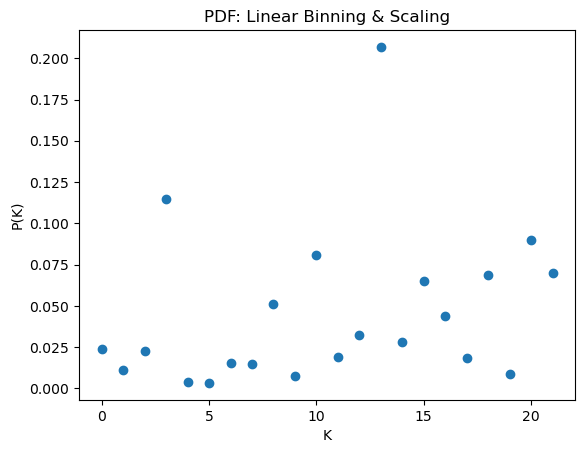

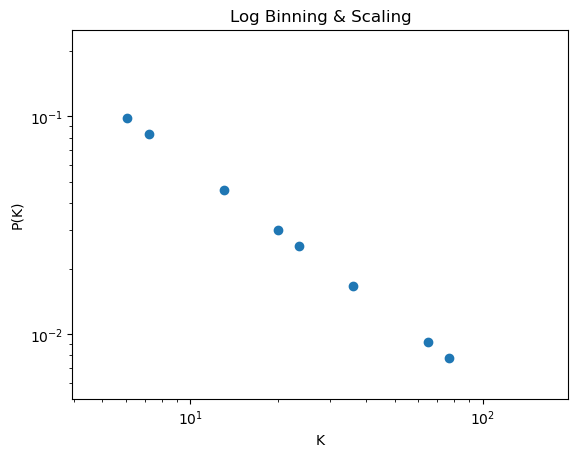

3.84


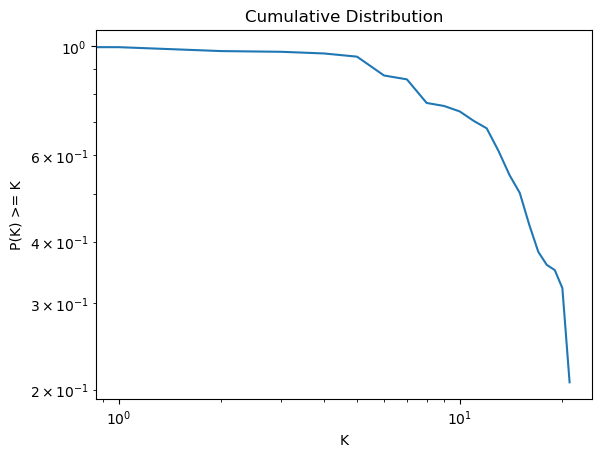

entropy: 3.84
variance: 35.222973581642776
vector_mu: 12.252947517730496
std: 5.934894572074787


In [4]:
shapes.basic_stats()

### Create Point & Apply KNN

In [42]:
x,y = state.create_corr_vectors(100,.09)
x = [abs(round(i,4)+1) for i in x]
y = [abs(round(i,4)+1) for i in y]

testNode = node.node(x[0],y[0],0,'test')
p = node.point(x, y,'shape_duration') 

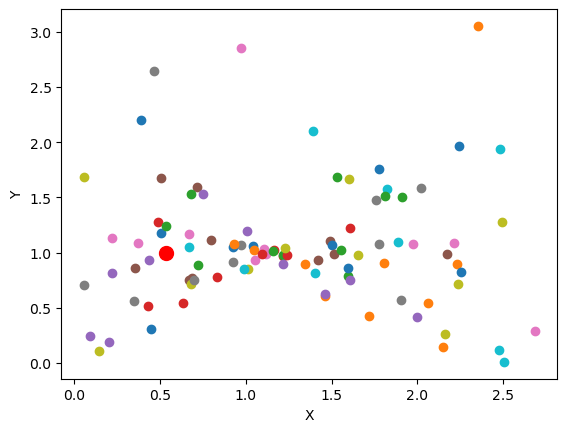

[(0.0, (0.9226, 1.0482), 0.9226),
 (0.0284, (0.9318, 1.0751), 0.9226),
 (0.0559, (0.9733, 1.0717), 0.9226),
 (0.1222, (1.044, 1.0624), 0.9226),
 (0.1271, (1.0479, 1.0269), 0.9226)]

In [43]:
p.knn_predict(testNode)

### Create More Vects

In [7]:
time_seen = node.vect('time_seen')
time_seen.set_up(list(df['duration']),False,True)

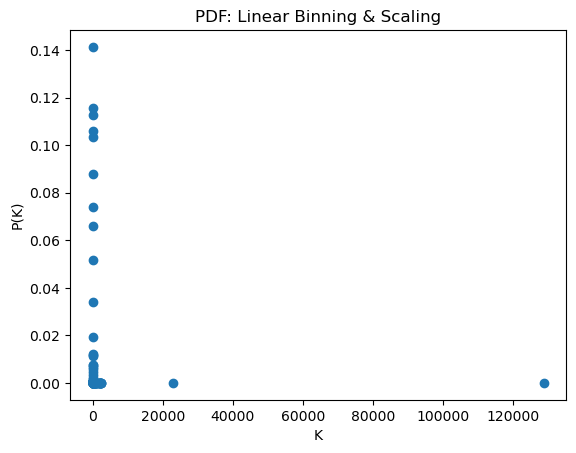

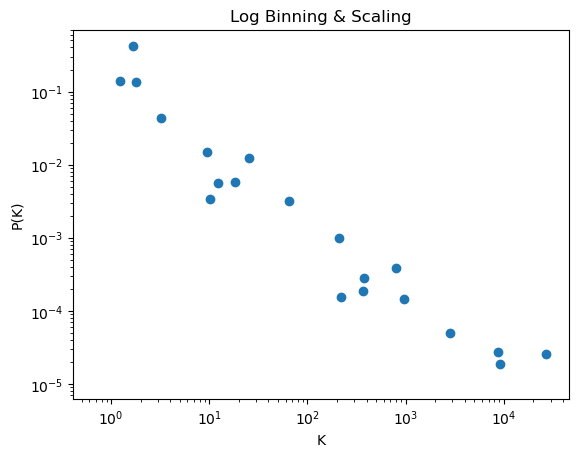

3.81


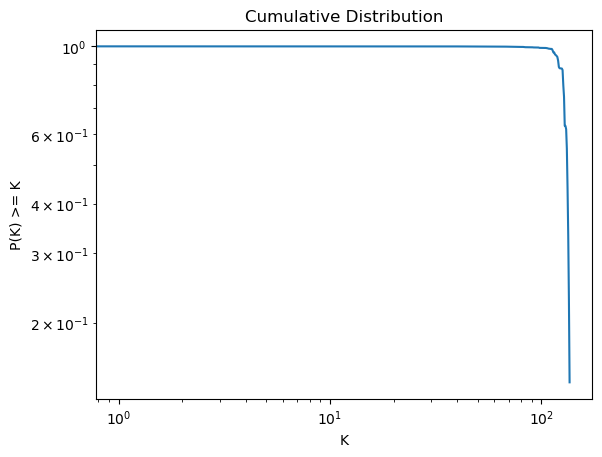

entropy: 3.81
variance: 194937.06433109762
vector_mu: 12.195982978723404
std: 441.51677695315


In [8]:
time_seen.basic_stats()

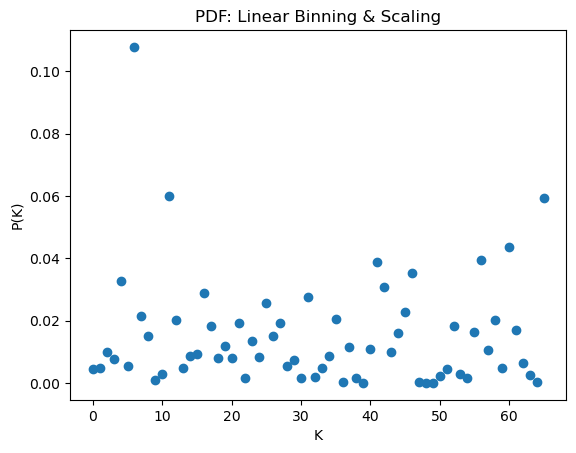

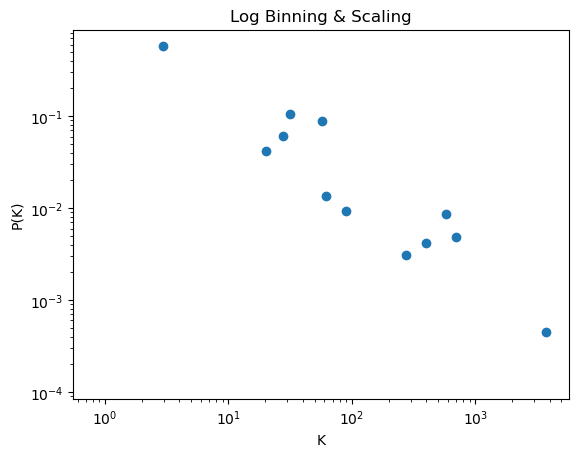

5.29


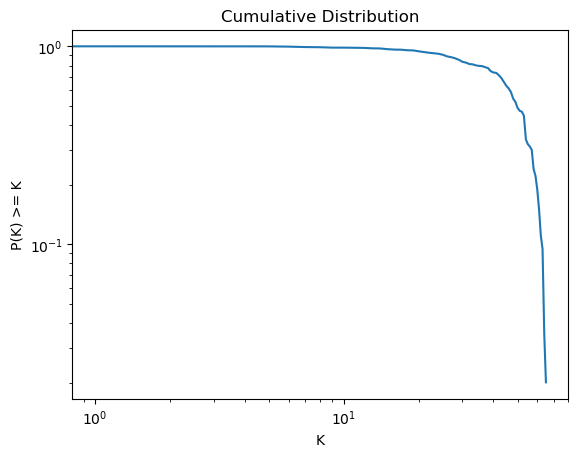

entropy: 5.29
variance: 424.79302799960567
vector_mu: 31.084913475177306
std: 20.61050770843857


In [9]:
state.basic_stats()

### Linear Regression & Outlier Cleaning

m = -7.207014351280902e-05 
b = 12.253826483974052


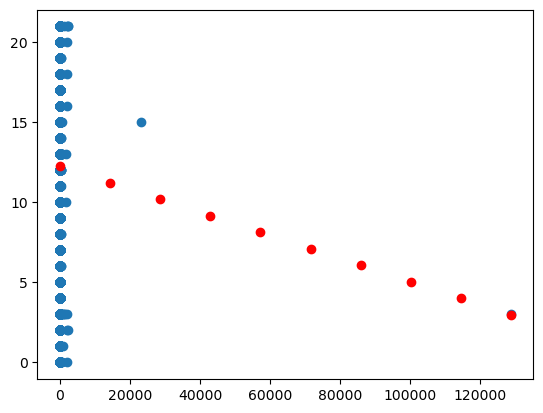

array([12.25454719, 11.22330351, 10.19205983,  9.16081616,  8.12957248,
        7.09832881,  6.06708513,  5.03584146,  4.00459778,  2.9733541 ])

In [13]:
p1 = node.point(time_seen.vector,shapes.vector,'shape_duration') 
p1.linear_regression()
# p2 = node.point(shapes.vector, state.vector,'shape_state') 
# p3 = node.point(state.vector, time_seen.vector,'state_duration') 

m = -7.760882251818118e-05 
b = 12.253885647494432


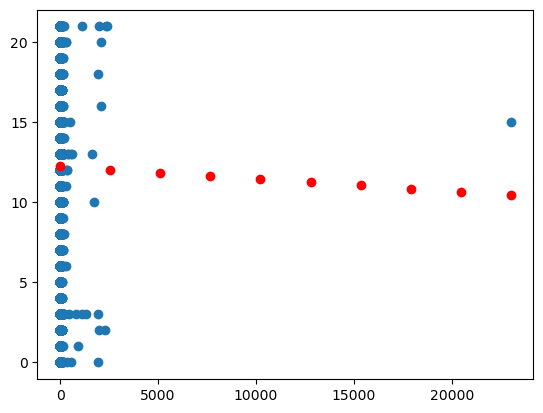

array([12.25466174, 12.05615561, 11.85764949, 11.65914337, 11.46063725,
       11.26213113, 11.06362501, 10.86511888, 10.66661276, 10.46810664])

In [14]:
# TODO: REMOVE extreme outliers
p1.remove_extreme_outlier()
p1.linear_regression()

m = -0.0014821481213609328 
b = 12.268446376715291


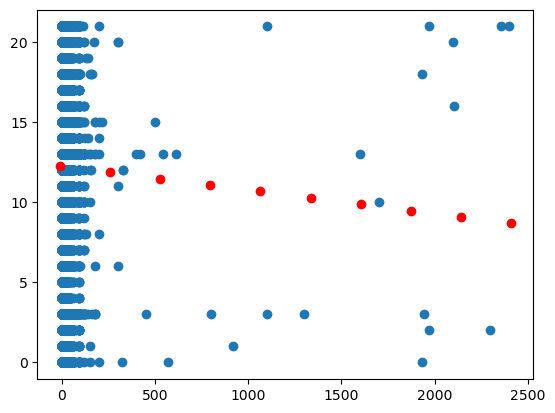

array([12.28326786, 11.8847347 , 11.48620153, 11.08766837, 10.68913521,
       10.29060205,  9.89206889,  9.49353573,  9.09500257,  8.6964694 ])

In [16]:
p1.remove_extreme_outlier()
p1.linear_regression()

m = 2.9864753754757496 
b = -0.07113435155552386


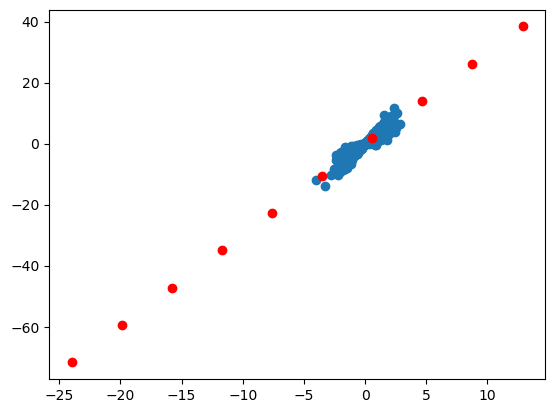

array([-71.72644052, -59.49317923, -47.25991794, -35.02665664,
       -22.79339535, -10.56013406,   1.67312723,  13.90638852,
        26.13964981,  38.3729111 ])

In [41]:
x,y = shapes.create_corr_vectors(1000,3)
p2 = node.point(x,y,'corr_v') 
p2.linear_regression()

m = 0.9119285122867808 
b = 0.4772026811892487


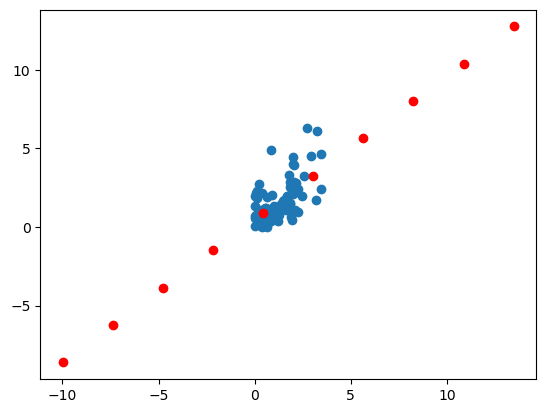

array([-8.62439103, -6.24800665, -3.87162227, -1.4952379 ,  0.88114648,
        3.25753086,  5.63391524,  8.01029961, 10.38668399, 12.76306837])

In [19]:
p2.remove_extreme_outlier()
p2.linear_regression()